## 读取MNIST数据

In [20]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

## 建立Autoencoders

In [23]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
784 / 32

24.5

## 训练Autoencoders

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2748 - val_loss: 0.1876
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1695 - val_loss: 0.1525
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1439 - val_loss: 0.1336
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1290 - val_loss: 0.1219
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1193 - val_loss: 0.1138
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1122 - val_loss: 0.1078
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1070 - val_loss: 0.1033
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1030 - val_loss: 0.1001
Epoch 9/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1001 - val_loss: 0.0975
Epoch

## 建立 Encoder

In [26]:
encoder = Model(input_img, encoded)

In [27]:
encoded_imgs = encoder.predict(x_test)

In [28]:
encoded_imgs.shape

(10000, 32)

## 建立 Decoder

In [29]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [30]:
decoded_imgs = decoder.predict(encoded_imgs)

In [31]:
decoded_imgs.shape

(10000, 784)

## 检视原始与重建数据

Populating the interactive namespace from numpy and matplotlib


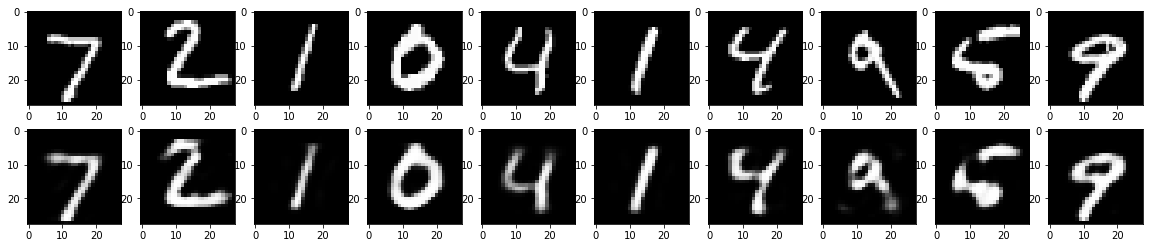

In [32]:
%pylab inline
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原始图片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))

    # 重建图片
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    
plt.show()